In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Classification base on petal length and petal width

In [6]:
df=data.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'Petal width')

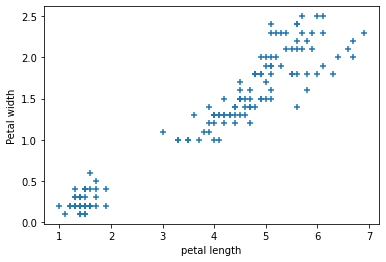

In [7]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],marker='+')
plt.xlabel("petal length")
plt.ylabel("Petal width")

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])

scaler=MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])

In [10]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


Text(0, 0.5, 'Petal width')

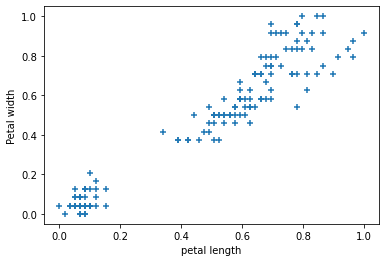

In [11]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],marker='+')
plt.xlabel("petal length")
plt.ylabel("Petal width")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


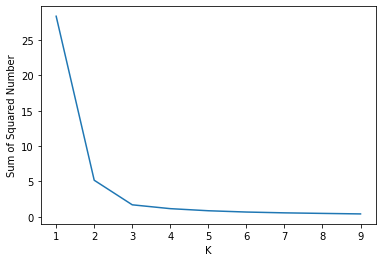

In [14]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

plt.xlabel("K")
plt.ylabel("Sum of Squared Number")
plt.plot(k_rng,sse)

In [15]:
model=KMeans(n_clusters=3)

In [19]:
y_predicted=model.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [23]:
model.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

In [25]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

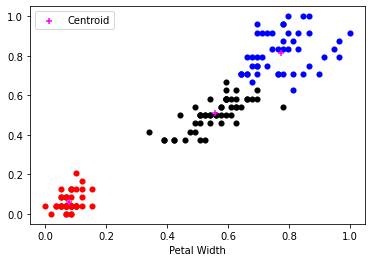

In [30]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],linewidths=0.1,color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],linewidths=0.1,color='blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],linewidths=0.1,color='black')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='magenta', marker='+',label='Centroid')
plt.xlabel("Petal Length")
plt.xlabel("Petal Width")
plt.legend()